# MNIST Classification - Five Layer NN

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data as mnist_data
import numpy as np
from matplotlib import pyplot as plt
tf.set_random_seed(0)

In [2]:
# download train and test data (28x28 images of handwritten digits)
mnist = mnist_data.read_data_sets("data", one_hot=True, reshape=False, validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
# input X: 28x28 grayscale images, the first dimension (None) will index the images in the mini-batch
X = tf.placeholder(tf.float32, [None, 28, 28, 1])

# correct answers will go here
Y_ = tf.placeholder(tf.float32, [None, 10])

# weights
W1 = tf.Variable(tf.truncated_normal([784, 200], stddev=0.1))
W2 = tf.Variable(tf.truncated_normal([200, 100], stddev=0.1))
W3 = tf.Variable(tf.truncated_normal([100, 60], stddev=0.1))
W4 = tf.Variable(tf.truncated_normal([60, 30], stddev=0.1))
W5 = tf.Variable(tf.truncated_normal([30, 10], stddev=0.1))

# biases
b1 = tf.Variable(tf.ones([200])/10)
b2 = tf.Variable(tf.ones([100])/10)
b3 = tf.Variable(tf.ones([60])/10)
b4 = tf.Variable(tf.ones([30])/10)
b5 = tf.Variable(tf.ones([10])/10)

In [4]:
# flatten the images into a single line of pixels
# -1 in the shape definition means "the only possible dimension that will preserve the number of elements"
XX = tf.reshape(X, [-1, 784])

In [5]:
# The model
Y1 = tf.nn.relu(tf.matmul(XX, W1) + b1)
Y2 = tf.nn.relu(tf.matmul(Y1, W2) + b2)
Y3 = tf.nn.relu(tf.matmul(Y2, W3) + b3)
Y4 = tf.nn.relu(tf.matmul(Y3, W4) + b4)
logits = tf.matmul(Y4, W5) + b5
Y = tf.nn.softmax(logits)

In [6]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*100

In [7]:
# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [8]:
# to keep track of max accuracy
max_accuracy = 0.0

In [9]:
train_step = tf.train.AdamOptimizer(0.003).minimize(cross_entropy)

In [10]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

train_loss_log = []
test_loss_log = []
train_accuracy_log = []
test_accuracy_log = []

In [11]:
def training_step(i):

    global max_accuracy
    # training on batches of 100 images with 100 labels
    batch_X, batch_Y = mnist.train.next_batch(100)

    # compute training values
    if (i % 10 == 0):
        a, c = sess.run([accuracy, cross_entropy], feed_dict={X: batch_X, Y_: batch_Y})
        train_accuracy_log.append([i,a])
        train_loss_log.append([i,c])        
        print(str(i) + ": accuracy:" + str(a) + " loss: " + str(c))

    # compute test values
    if (i % 50 == 0):
        a, c = sess.run([accuracy, cross_entropy], feed_dict={X: mnist.test.images, Y_: mnist.test.labels})
        test_accuracy_log.append([i,a])
        test_loss_log.append([i,c])  
        if (a > max_accuracy):
            max_accuracy = a

        print(str(i) + ": $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:" + str(a) + " test loss: " + str(c))

    # the backpropagation training step
    sess.run(train_step, feed_dict={X: batch_X, Y_: batch_Y})

In [12]:
# run this thang
for i in range(10000+1): 
    training_step(i)

0: accuracy:0.07 loss: 230.73477
0: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.0638 test loss: 230.94453
10: accuracy:0.58 loss: 135.914
20: accuracy:0.83 loss: 63.654907
30: accuracy:0.81 loss: 63.851772
40: accuracy:0.83 loss: 53.81296
50: accuracy:0.88 loss: 39.378273
50: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.8652 test loss: 43.744976
60: accuracy:0.87 loss: 39.927258
70: accuracy:0.9 loss: 45.17652
80: accuracy:0.89 loss: 40.726784
90: accuracy:0.89 loss: 40.52888
100: accuracy:0.96 loss: 17.749805
100: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9208 test loss: 26.385063
110: accuracy:0.9 loss: 35.70694
120: accuracy:0.88 loss: 48.728813
130: accuracy:0.94 loss: 18.433422
140: accuracy:0.96 loss: 21.24027
150: accuracy:0.91 loss: 25.306332
150: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9311 test loss: 22.197256
160: accuracy:0.95 loss: 16.052616
170: accuracy:0.93 loss: 24.748373
180: accuracy:0.87 loss: 34.68332
190: accuracy:0.87 loss: 35.12728
200: accuracy:0.94 loss: 29.669512
20

1700: accuracy:0.98 loss: 14.002137
1700: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9724 test loss: 10.4408045
1710: accuracy:0.98 loss: 3.801822
1720: accuracy:0.95 loss: 16.929752
1730: accuracy:0.99 loss: 5.483387
1740: accuracy:0.97 loss: 12.3310795
1750: accuracy:0.98 loss: 6.4230385
1750: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9709 test loss: 9.695157
1760: accuracy:0.97 loss: 8.651163
1770: accuracy:0.97 loss: 9.316228
1780: accuracy:0.96 loss: 10.806997
1790: accuracy:0.98 loss: 10.299516
1800: accuracy:0.99 loss: 2.8049543
1800: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9715 test loss: 9.439163
1810: accuracy:0.99 loss: 5.7278085
1820: accuracy:0.99 loss: 2.7865891
1830: accuracy:0.99 loss: 1.8844385
1840: accuracy:0.98 loss: 3.0211234
1850: accuracy:0.99 loss: 3.5943866
1850: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9773 test loss: 8.313051
1860: accuracy:1.0 loss: 1.8310536
1870: accuracy:0.99 loss: 3.179549
1880: accuracy:0.98 loss: 4.927017
1890: accuracy:0.98 loss: 7.1054

3390: accuracy:0.98 loss: 8.264718
3400: accuracy:0.98 loss: 5.45847
3400: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9767 test loss: 8.5812645
3410: accuracy:0.96 loss: 10.199021
3420: accuracy:1.0 loss: 0.571113
3430: accuracy:0.99 loss: 3.220012
3440: accuracy:0.99 loss: 1.9202864
3450: accuracy:0.99 loss: 4.210985
3450: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9763 test loss: 9.21571
3460: accuracy:0.96 loss: 10.453347
3470: accuracy:1.0 loss: 1.3679972
3480: accuracy:1.0 loss: 0.6682226
3490: accuracy:1.0 loss: 2.261457
3500: accuracy:0.99 loss: 1.345681
3500: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9764 test loss: 9.111519
3510: accuracy:0.99 loss: 3.858383
3520: accuracy:0.98 loss: 3.7867942
3530: accuracy:0.99 loss: 3.577365
3540: accuracy:0.98 loss: 9.413552
3550: accuracy:0.97 loss: 7.557419
3550: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9744 test loss: 9.582883
3560: accuracy:0.97 loss: 5.846695
3570: accuracy:1.0 loss: 0.39707887
3580: accuracy:1.0 loss: 0.6561993
3590: accu

5080: accuracy:0.99 loss: 1.8283699
5090: accuracy:0.99 loss: 2.9882417
5100: accuracy:0.99 loss: 2.8080285
5100: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9765 test loss: 9.402236
5110: accuracy:0.99 loss: 1.8226941
5120: accuracy:1.0 loss: 1.4851559
5130: accuracy:1.0 loss: 1.2507323
5140: accuracy:0.99 loss: 3.9112165
5150: accuracy:0.98 loss: 2.2506864
5150: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9774 test loss: 9.660546
5160: accuracy:0.98 loss: 9.606273
5170: accuracy:0.97 loss: 2.8787029
5180: accuracy:0.99 loss: 1.3870255
5190: accuracy:0.97 loss: 10.785698
5200: accuracy:0.99 loss: 4.998749
5200: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.978 test loss: 9.479847
5210: accuracy:0.98 loss: 12.098018
5220: accuracy:0.98 loss: 4.718106
5230: accuracy:0.99 loss: 2.2078445
5240: accuracy:0.99 loss: 4.6460357
5250: accuracy:0.99 loss: 2.7114568
5250: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9771 test loss: 9.903566
5260: accuracy:0.99 loss: 2.9286327
5270: accuracy:0.99 loss: 1.462805

6770: accuracy:0.99 loss: 2.6806407
6780: accuracy:1.0 loss: 0.29527557
6790: accuracy:0.99 loss: 1.4547441
6800: accuracy:1.0 loss: 0.2213957
6800: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9797 test loss: 8.681039
6810: accuracy:0.99 loss: 4.600551
6820: accuracy:0.99 loss: 12.691087
6830: accuracy:1.0 loss: 0.26503322
6840: accuracy:0.99 loss: 1.8643326
6850: accuracy:0.98 loss: 6.696673
6850: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.981 test loss: 7.612308
6860: accuracy:1.0 loss: 0.06392168
6870: accuracy:1.0 loss: 1.4621451
6880: accuracy:0.99 loss: 2.9826396
6890: accuracy:0.99 loss: 1.5431023
6900: accuracy:0.99 loss: 1.5495248
6900: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9807 test loss: 8.179619
6910: accuracy:0.99 loss: 1.7806106
6920: accuracy:0.99 loss: 1.062458
6930: accuracy:1.0 loss: 0.0717242
6940: accuracy:0.98 loss: 3.3211153
6950: accuracy:1.0 loss: 1.0584351
6950: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9791 test loss: 8.824426
6960: accuracy:1.0 loss: 0.75791216


8460: accuracy:1.0 loss: 0.5876944
8470: accuracy:1.0 loss: 0.08534483
8480: accuracy:1.0 loss: 0.41965976
8490: accuracy:1.0 loss: 0.19215006
8500: accuracy:1.0 loss: 0.13652454
8500: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9826 test loss: 9.122369
8510: accuracy:1.0 loss: 0.020566873
8520: accuracy:1.0 loss: 0.11744533
8530: accuracy:1.0 loss: 0.16766986
8540: accuracy:0.99 loss: 1.9834509
8550: accuracy:0.99 loss: 1.313987
8550: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9804 test loss: 10.466257
8560: accuracy:0.99 loss: 2.1985123
8570: accuracy:0.98 loss: 8.486802
8580: accuracy:0.99 loss: 8.015436
8590: accuracy:1.0 loss: 0.031663172
8600: accuracy:1.0 loss: 0.5309511
8600: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.976 test loss: 11.138245
8610: accuracy:1.0 loss: 0.13788456
8620: accuracy:1.0 loss: 0.37875116
8630: accuracy:0.99 loss: 1.562237
8640: accuracy:1.0 loss: 0.022704327
8650: accuracy:0.98 loss: 13.147642
8650: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9784 test loss: 10.

In [13]:
print("max test accuracy: " + str(max_accuracy))

max test accuracy: 0.9826


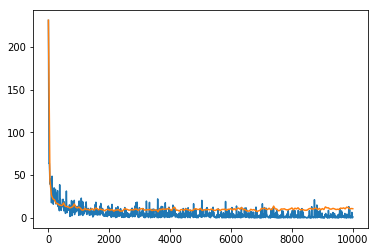

In [18]:
train_loss_log = np.array(train_loss_log)
test_loss_log = np.array(test_loss_log)

plt.plot(train_loss_log[:,0],train_loss_log[:,1])
plt.plot(test_loss_log[:,0],test_loss_log[:,1])
plt.ylim(top=30, bottom=0)
plt.show()

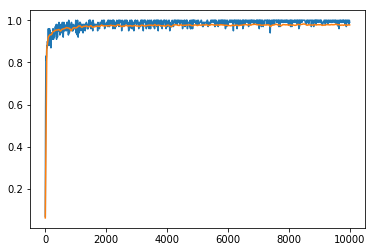

In [19]:
train_accuracy_log = np.array(train_accuracy_log)
test_accuracy_log = np.array(test_accuracy_log)

plt.plot(train_accuracy_log[:,0],train_accuracy_log[:,1])
plt.plot(test_accuracy_log[:,0],test_accuracy_log[:,1])
#plt.ylim(top = 1, bottom=.9)
plt.show()